In [29]:
#region Basic_Import
## Basic
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.path.dirname(os.path.abspath('__file__'))
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
from pandas import DataFrame, Series

import math, random

## Datetime
import time
import datetime as dt
from datetime import datetime, date, timedelta

import glob
from glob import glob
import requests
import json

## 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from scipy import stats

# K-Means 알고리즘
from sklearn.cluster import KMeans, MiniBatchKMeans

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score, rand_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix

## 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics

import urllib
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

from tqdm.notebook import tqdm
import tqdm

## Init.
pd.options.display.float_format = '{:.10f}'.format
#endregion Basic_Import

In [30]:
## Import_DL
str_tar = "tf"
## For Torch
if str_tar == "torch":
    import torch
    import torch.nn as nn
    from torch.nn.utils import weight_norm
    print("Torch Imported")
## For TF
elif str_tar == "tf":
    import tensorflow as tf
    import tensorflow_addons as tfa
    from keras.callbacks import EarlyStopping, ModelCheckpoint
    from keras.models import Sequential, load_model
    from keras_flops import get_flops
    print("Tensorflow Imported")
else:
    print("Error : Cannot be used except for Keywords")
    print(" : torch / tf")

Tensorflow Imported


In [31]:
## Import_Local
from Src_Dev_Common import Data_Datetime as com_date
# from Src_Dev_Common import DEV_KASI_Holiday as com_Holi
# from Src_Dev_Common import DEV_Common_Data_Analysis as com_Analysis
from Src_Dev_Common import Data_Preprocessing as com_Prep
from Src_Dev_Common import Common_Model as com_Model
# from Src_Dev_Common import DEV_Common_Data_Visualization as com_Visual
# from Src_Dev_Common import DEV_KMA_Weather_ASOS as com_ASOS
# from Src_Dev_Common import DEV_KDHC_Usage as com_KDHC
# from Src_Dev_Common import DEV_KIER_Usage as com_KIER

## Data Load

In [32]:
## Raw Data Load
df_KIER_5Domain = pd.read_csv('KIER_Merged_5domain_2024-12-01.csv', index_col = 0)

data = df_KIER_5Domain.drop(['METER_DATE', 'YEAR'], axis=1)
back_data = df_KIER_5Domain.drop(['YEAR'], axis=1)

print(df_KIER_5Domain.shape, '///', df_KIER_5Domain.columns)
df_KIER_5Domain

(16413, 26) /// Index(['METER_DATE', 'YEAR', 'MONTH', 'DAY', 'code_day_of_the_week', 'HOUR',
       'MINUTE', 'temp_outdoor', 'temp_dew_point', 'temp_ground', 'humidity',
       'rainfall', 'snowfall', 'snowfall_3hr', 'wind_speed', 'wind_direction',
       'pressure_vapor', 'pressure_area', 'pressure_sea', 'sunshine',
       'solar_radiation', 'cloud_total', 'cloud_midlow', 'visual_range',
       'HEAT_INST', 'HOT_INST'],
      dtype='object')


,METER_DATE,YEAR,MONTH,DAY,code_day_of_the_week,HOUR,MINUTE,temp_outdoor,temp_dew_point,temp_ground,...,pressure_vapor,pressure_area,pressure_sea,sunshine,solar_radiation,cloud_total,cloud_midlow,visual_range,HEAT_INST,HOT_INST
0,2022-07-20 13:00:00,2022,7,20,2,13,0,29.8000000000,21.4000000000,41.5000000000,...,25.5000000000,1002.4000000000,1006.8000000000,1.0000000000,2.8900000000,8.0000000000,2.0000000000,1903.0000000000,0.0001975346,0.0000093275
1,2022-07-20 14:00:00,2022,7,20,2,14,0,30.4000000000,20.0000000000,42.4000000000,...,23.4000000000,1002.2000000000,1006.6000000000,1.0000000000,2.8500000000,8.0000000000,1.0000000000,1986.0000000000,0.0001975346,0.0000031403
2,2022-07-20 15:00:00,2022,7,20,2,15,0,30.5000000000,21.0000000000,41.9000000000,...,24.9000000000,1002.0000000000,1006.4000000000,0.8000000000,2.3800000000,7.0000000000,2.0000000000,1985.0000000000,0.0001975346,0.0000034357
3,2022-07-20 16:00:00,2022,7,20,2,16,0,30.8000000000,20.7000000000,39.7000000000,...,24.4000000000,1001.5000000000,1005.9000000000,1.0000000000,2.1900000000,5.0000000000,3.0000000000,1993.0000000000,0.0001975346,0.0000072374
4,2022-07-20 17:00:00,2022,7,20,2,17,0,29.5000000000,20.0000000000,34.5000000000,...,23.4000000000,1001.6000000000,1006.0000000000,0.3000000000,1.0200000000,9.0000000000,1.0000000000,2000.0000000000,0.0001975346,0.0000123613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16408,2024-06-03 05:00:00,2024,6,3,0,5,0,13.1000000000,10.8000000000,14.7000000000,...,12.9000000000,1005.8000000000,1010.5000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,2976.0000000000,0.0000000000,0.0000305033
16409,2024-06-03 06:00:00,2024,6,3,0,6,0,13.7000000000,10.8000000000,15.0000000000,...,12.9000000000,1006.2000000000,1010.9000000000,0.1000000000,0.0500000000,0.0000000000,0.0000000000,3874.0000000000,0.0000000000,0.0000944223
16410,2024-06-03 07:00:00,2024,6,3,0,7,0,18.0000000000,11.9000000000,17.0000000000,...,13.9000000000,1006.7000000000,1011.4000000000,1.0000000000,0.5600000000,0.0000000000,0.0000000000,5000.0000000000,0.0000000000,0.0002607810
16411,2024-06-03 08:00:00,2024,6,3,0,8,0,19.7000000000,12.2000000000,22.5000000000,...,14.2000000000,1006.6000000000,1011.2000000000,1.0000000000,1.2500000000,0.0000000000,0.0000000000,5000.0000000000,0.0000000000,0.0000540724


##  For Scaling

In [33]:
scaler_data = MinMaxScaler()
scaler_data.fit(data)
scaled_data = scaler_data.transform(data)

new_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

## Input/Target 분리
heat_hot_X = new_data.drop([], axis=1).iloc[:-1,]
heat_hot_Y = new_data[['HEAT_INST','HOT_INST']].iloc[1:,]

## Train/Test 분리
trainX_heat_hot, testX_heat_hot, trainY_heat_hot, testY_heat_hot = train_test_split(heat_hot_X, heat_hot_Y, test_size=0.3, shuffle=False, random_state=0)

In [34]:
def buildDataSet(input, target, seqLength):
    xdata = []
    ydata = []
    for i in range(len(input) - seqLength):
        tx = input.iloc[i:i+seqLength]
        ty = target.iloc[i+seqLength-1]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)

In [35]:
trainx_heat_hot, trainy_heat_hot = buildDataSet(trainX_heat_hot, trainY_heat_hot, 24)
testx_heat_hot, testy_heat_hot = buildDataSet(testX_heat_hot, testY_heat_hot, 24)

In [36]:
def seq2seq_model(input_shape):
    model_input = tf.keras.layers.Input(shape=input_shape)

    # for feature extracting
    conv1 = tf.keras.layers.Conv1D(128, 1, activation='swish')(model_input)
    pool1 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv1)
    conv2 = tf.keras.layers.Conv1D(64, 1, activation='swish')(pool1)
    pool2 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv2)
    conv3 = tf.keras.layers.Conv1D(32, 1, activation='swish')(pool2) #
    pool3 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv3)#

    # 인코더 - 디코더 선언
    encoder_lstm1 = tf.keras.layers.LSTM(32, return_sequences=True, activation='tanh') #
    encoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    encoder_lstm3 = tf.keras.layers.LSTM(128, return_state=True, return_sequences=True, activation='tanh')

    decoder_lstm1 = tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh')
    decoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    decoder_lstm3 = tf.keras.layers.LSTM(32, return_sequences=True, activation='tanh') #

    # 인코더
    encoder_output_lstm1 = encoder_lstm1(pool3) #
    encoder_output_lstm2 = encoder_lstm2(pool2)
    encoder_output_lstm3, state_h, state_c = encoder_lstm3(encoder_output_lstm2)

    #디코더
    decoder_lstm1_output = decoder_lstm1(encoder_output_lstm3, initial_state=[state_h, state_c])
    decoder_lstm2_output = decoder_lstm2(decoder_lstm1_output)
    decoder_lstm3_output = decoder_lstm3(decoder_lstm2_output) #

    flatten = tf.keras.layers.Flatten()(decoder_lstm2_output)
    model_output = tf.keras.layers.Dense(2)(flatten)
    
    model = tf.keras.models.Model(model_input, model_output)

    model.summary()
    
    return model

In [37]:
model_heat_hot = seq2seq_model(input_shape=(24, 24))

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 24, 24)]     0           []                               
                                                                                                  
 conv1d_6 (Conv1D)              (None, 24, 128)      3200        ['input_3[0][0]']                
                                                                                                  
 max_pooling1d_6 (MaxPooling1D)  (None, 24, 128)     0           ['conv1d_6[0][0]']               
                                                                                                  
 conv1d_7 (Conv1D)              (None, 24, 64)       8256        ['max_pooling1d_6[0][0]']        
                                                                                            

In [38]:
int_epoch, int_bat_size = 500, 256
tm_start = time.time()

## heat / hot
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='s2s_heat_hot_multi.h5')
model_heat_hot.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_heat_hot = model_heat_hot.fit(trainx_heat_hot, trainy_heat_hot, epochs=int_epoch, batch_size=256, callbacks=[earlystopping,checkpoint])
model_heat_hot = load_model('s2s_heat_hot_multi.h5')

tm_code = time.time() - tm_start

Epoch 1/500
45/45 [==============================] - 3s 18ms/step - loss: 0.0744 - mse: 0.0180
Epoch 2/500
45/45 [==============================] - 1s 16ms/step - loss: 0.0591 - mse: 0.0099
Epoch 3/500
45/45 [==============================] - 1s 16ms/step - loss: 0.0514 - mse: 0.0083
Epoch 4/500
45/45 [==============================] - 1s 16ms/step - loss: 0.0492 - mse: 0.0079
Epoch 5/500
45/45 [==============================] - 1s 16ms/step - loss: 0.0478 - mse: 0.0076
Epoch 6/500
45/45 [==============================] - 1s 16ms/step - loss: 0.0470 - mse: 0.0075
Epoch 7/500
45/45 [==============================] - 1s 16ms/step - loss: 0.0465 - mse: 0.0073
Epoch 8/500
45/45 [==============================] - 1s 16ms/step - loss: 0.0455 - mse: 0.0072
Epoch 9/500
45/45 [==============================] - 1s 16ms/step - loss: 0.0448 - mse: 0.0070
Epoch 10/500
45/45 [==============================] - 1s 16ms/step - loss: 0.0444 - mse: 0.0069
Epoch 11/500
45/45 [=============================

In [39]:
# 정규화 되돌리기 함수 
def back_MinMax(data, value):
    diff = np.max(data, axis=0)-np.min(data, axis=0)
    back = value * diff + np.min(data, axis=0)
    return back 

In [40]:
## 평가지표
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def mean_bias_error(true, pred):
    mbe_loss = np.sum(true - pred)/true.size
    return mbe_loss

154/154 [==============================] - 1s 7ms/step
MAE  :  0.0488
MAPE :  1.0064
MSE  :  0.0064
RMSE :  0.0797
MBE :  0.0152
R2   :  0.6659


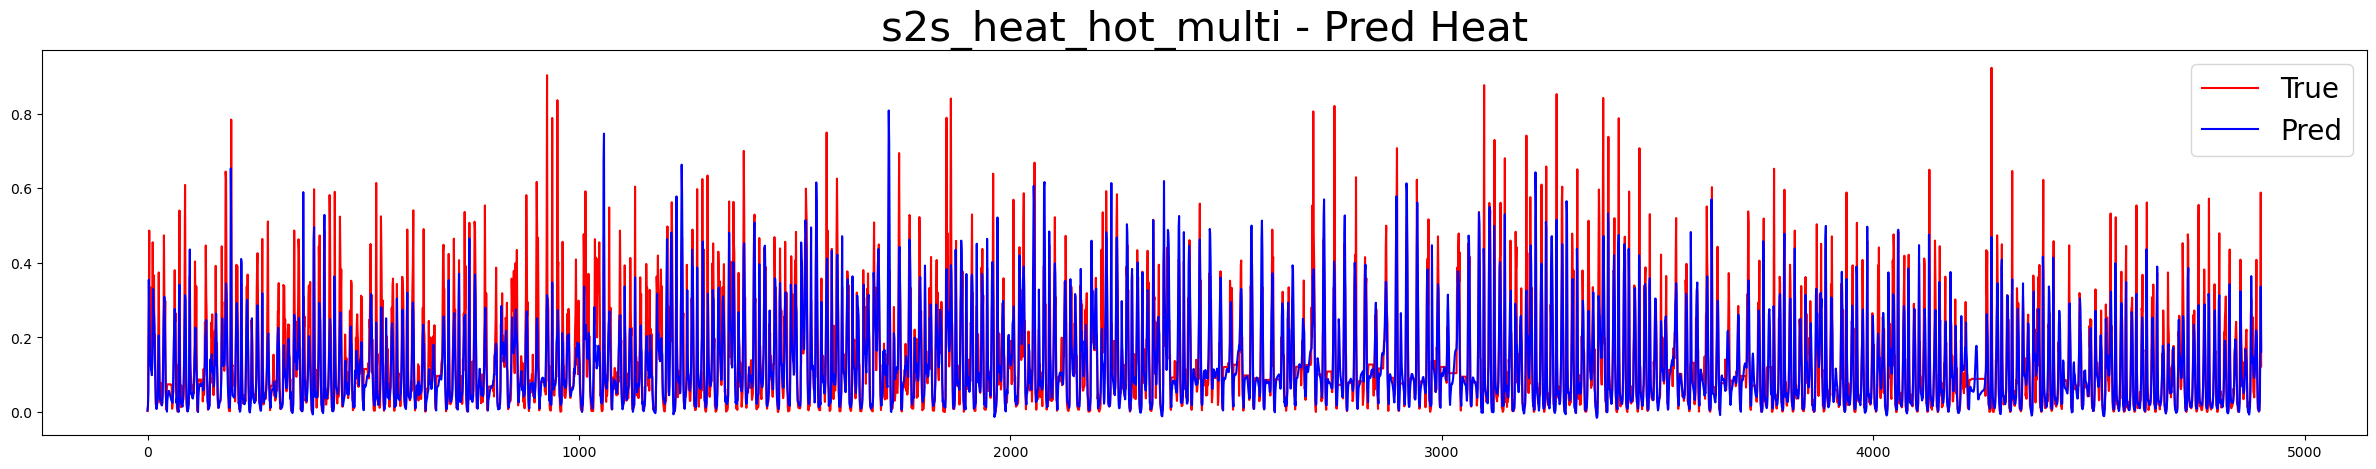

MAE  :  0.0
MAPE :  5027.5056
MSE  :  0.0
RMSE :  0.0
MBE :  -0.0
R2   :  0.8543


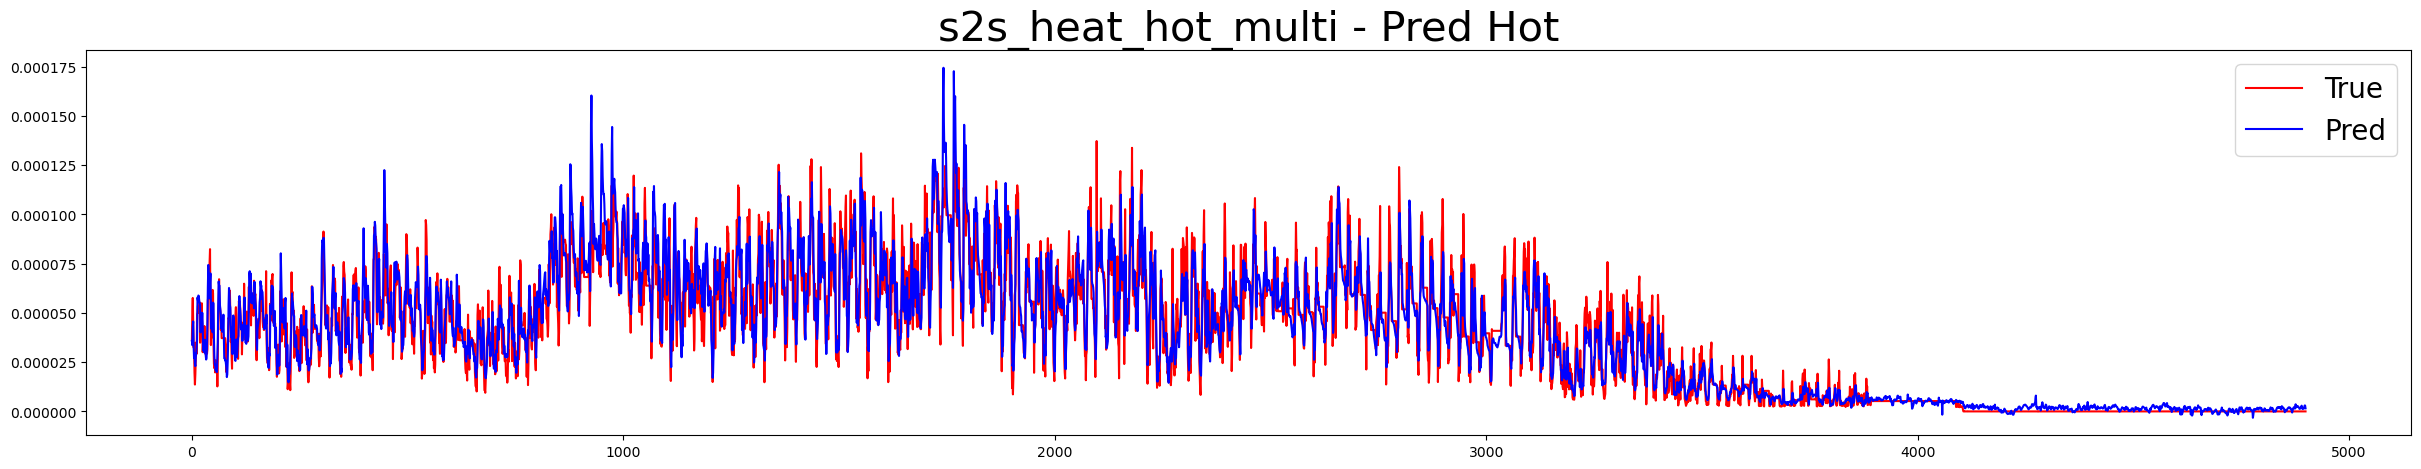

Train 소요 시간 :  367.31229519844055


In [41]:
## 2 Domain Multivariate, HEAT/HOT
pred_heat = back_MinMax(back_data.to_numpy()[:, [-2]], model_heat_hot.predict(testx_heat_hot)[:,1])
real_heat = back_MinMax(back_data.to_numpy()[:, [-2]], testy_heat_hot[:,1])

pred_hot = back_MinMax(back_data.to_numpy()[:, [-1]], model_heat_hot.predict(testx_heat_hot)[:,0])
real_hot = back_MinMax(back_data.to_numpy()[:, [-1]], testy_heat_hot[:,0])

str_model = 's2s_heat_hot_multi'
com_Model.model_sk_metrics(real_heat, pred_heat)
com_Model.model_visualization(real_heat, pred_heat, str_model + ' - Pred Heat')

com_Model.model_sk_metrics(real_hot, pred_hot)
com_Model.model_visualization(real_hot, pred_hot, str_model + ' - Pred Hot')

print("Train 소요 시간 : ", tm_code)